In [4]:
import numpy as np
import pandas as pd 
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import datasets
from tensorflow.keras import utils
from sklearn.datasets import load_files

In [5]:
# system data
train_dir = './images/train'
test_dir = './images/test'
valid_dir = './images/valid'

# images will be rescaled by 1./255
train_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                                        shear_range=0.2, 
                                                                        zoom_range=0.2, 
                                                                        horizontal_flip=True)

test_data_generation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# images in batches of 10
# number of samples processed before the model is updated
train_generator = train_data_generation.flow_from_directory(train_dir, target_size=(200, 200), 
                                                            batch_size=10, class_mode='categorical')

validation_generator = test_data_generation.flow_from_directory(valid_dir, target_size=(200, 200), 
                                                                batch_size=10, class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [6]:
# training a model with 98% accuracy
class get_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
print('Compiled!')

callbacks = get_Callback()
history = model.fit(train_generator, batch_size = 32, epochs=20, validation_data=validation_generator, callbacks=[callbacks], verbose=1, shuffle=True)

Compiled!
Epoch 1/20
166/166 [==============================] - 55s 326ms/step - loss: 1.9384 - accuracy: 0.3309 - val_loss: 1.2103 - val_accuracy: 0.6667
Epoch 2/20
166/166 [==============================] - 59s 357ms/step - loss: 1.1708 - accuracy: 0.5719 - val_loss: 0.8084 - val_accuracy: 0.8472
Epoch 3/20
166/166 [==============================] - 60s 364ms/step - loss: 0.8229 - accuracy: 0.7162 - val_loss: 0.3926 - val_accuracy: 0.9028
Epoch 4/20
166/166 [==============================] - 59s 354ms/step - loss: 0.6231 - accuracy: 0.7935 - val_loss: 0.1665 - val_accuracy: 0.9444
Epoch 5/20
166/166 [==============================] - 59s 358ms/step - loss: 0.5204 - accuracy: 0.8267 - val_loss: 2.2654 - val_accuracy: 0.5417
Epoch 6/20
166/166 [==============================] - 65s 389ms/step - loss: 0.4776 - accuracy: 0.8629 - val_loss: 0.2775 - val_accuracy: 0.9167
Epoch 7/20
166/166 [==============================] - 62s 370ms/step - loss: 0.4428 - accuracy: 0.8653 - val_loss: 0.231

In [ ]:
# plotting graphs
plt.figure(1)  
# history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
# history for loss    
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [3]:
def get_load_dataset(path):
    data = sk.datasets.load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [8]:
x_test, y_test, target_labels = get_load_dataset(test_dir)

number_of_classes = len(np.unique(y_test))
number_of_classes

y_test = tf.keras.utils.to_categorical(y_test,number_of_classes)

In [9]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(file)))
    return images_as_array


x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [10]:
# visualize test prediction.
y_pred = model.predict(x_test)

7

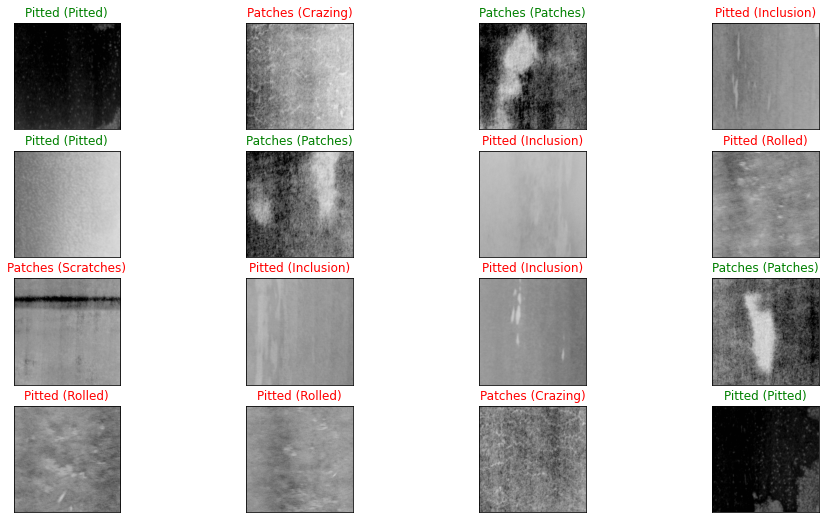

In [16]:
# plot a raandom sample of test images, their predicted labels, and ground truth
figure = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    axis = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    axis.imshow(np.squeeze((x_test[idx] * 255).astype(np.uint8)))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    axis.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))